<a href="https://colab.research.google.com/github/pharringtonp19/econometrics/blob/main/notebooks/optimization/Automatic_Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Install Modules { display-mode: "form" }
%%capture
!pip install --upgrade pip
!pip install --upgrade "jax[cpu]"

In [ ]:
#@title Import Modules { display-mode: "form" }
import jax 
import jax.numpy as jnp 
import matplotlib.pyplot as plt

- the map from the vector space of linear maps to the vector space of matrices is homomorphic that is, it presreves the composition, matrix multiplication. -- [ref](https://youtu.be/9DId0iMTN6o?list=PLelIK3uylPMGzHBuR3hLMHrYfMqWWsmx5&t=1298)

### **Questions**
- Modern frameworks implement **jacobian vector products** Efficiently?
- How would be evaluate construct the jacobian matrix of $f$ when $f$ is the composition of functions? Feeding in a one-hot column vector to the "first" matrix does not produce a one-hot vector that I can pass along to the "second" matrix
- What is the **type constructor**
- Why do we call it the **directional derivative**?

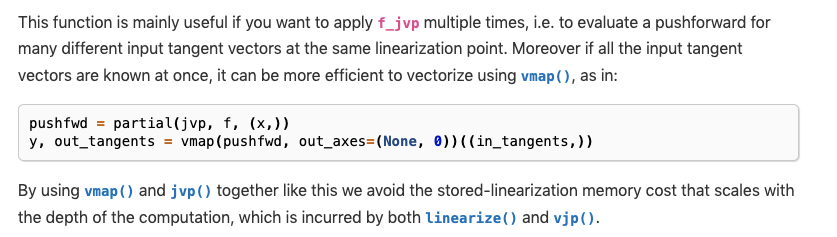

### **Summary**
If we can partially evaluate **jvp**, then transpose the linear map, we get the output of **vjp**

### **Why We Care About <font color="purple"> Vector-Jacobian Products </font>**
$\partial \mathcal{L}(\theta)$ can be represented as the composition of matrices as follows -- in practice, $\theta$ is perhaps only a subset of the parameters of interest.

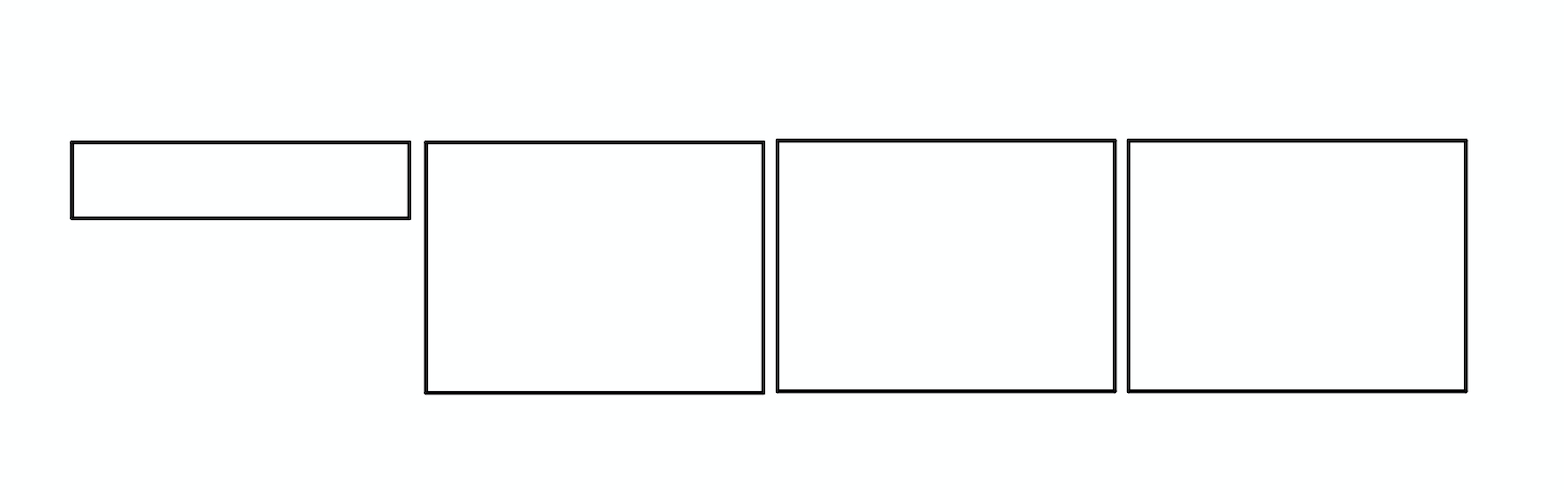

### **How Dex/Jax implement <font color="purple"> Vector-Jacobian Products </font>**

In addition to evluating the function, the vector-Jacobain product evaluates the transpose of the differential of $f$ at $\theta$, i.e. it evaluates
\begin{align*}
\partial f(\theta)^T
\end{align*}

We construct this as follows. We assume that we have implemented the Jacobian Vector Product defined below.

\begin{align*}
\textrm{jvp} &:: (a → b) → (a, \ T \ a) \rightarrow (b,\  T \ b) \\
\end{align*}

by paritally evaluting the JVP (someone known as "curried jvp") (or equivalently thought of as linearization, it's as if we carry out the following sequence of computations. 

\begin{align*}
\textrm{linearize} &:: (a \rightarrow b) → a → (b, \ T \ a \ \text{-}o \  T \ b)
\end{align*}


Importantly, this partial evaluation of the jvp gives us (1) the evaluation of the function of interest, and (2) the differential of $f$ evaluated at $\theta$. Transposing such a map, we can now reproduce the output of vjp.

Computationally, we don't work with elements of the dual of the tangent spaces, but rather elements in the tangent spaces. The only technical distinction is that we aren't computing the transpose so much as we are computing the adjoint of the differential of $f$ at $\theta$.

### **Key Summary**
> Partially evaluated, the **vector jacobian product** is the transpose of the **jacobian vector product**.  As practitioners, given the relative dimensionality of the output to input, we are interested in **vector jacobian products**.

- I believe that the only conceptual challenge here is that we represent elements of the dual space by column vectors?!

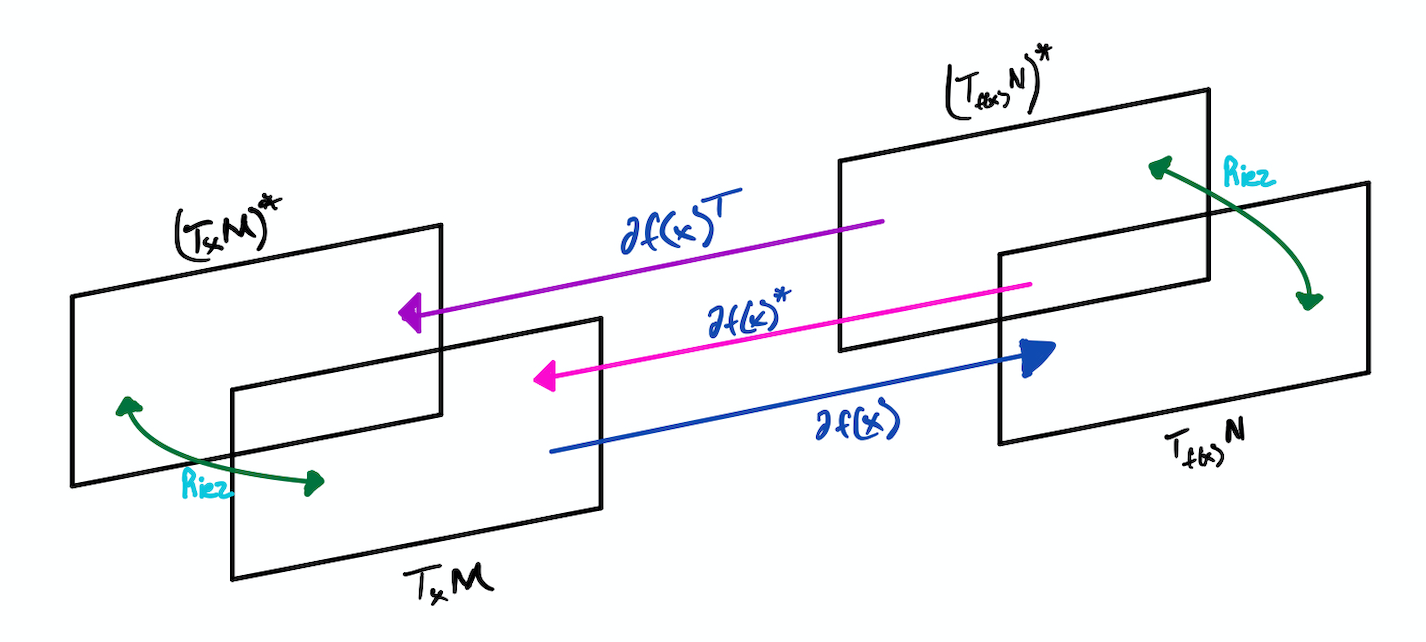

### **Transpose of a Linear Map**

- Let $f$ be a linear transformation, $f:V \rightarrow W$, where $(V,W)$ are vector spaces over the field $R$. 
- Then we can define the transpose of $f$, denoted by $f^T$, as follows:
\begin{align*}
f^T : W^* \rightarrow V^*, \quad w^* \longmapsto f^T(w^*) = w^* \circ f
\end{align*}

- That is, a linear map generates <font color='red'>a canonical isomorphism </font> between the dual spaces of $W$ and $V$. We call this isomorphism the transpose of $f$.



### **Transpose of a Linear Map <font color=purple> Between Inner Product Spaces</font>**

- If $W$ has an inner product, then 
\begin{align*}
w^* \big( f (v) \big) = \langle f(v), r_{w^*}\rangle
\end{align*}
- An conversely, if $V$ also has an inner product, then 
\begin{align*}
w^* \circ f (v) = \langle v, r_{w^* \circ f}\rangle
\end{align*}

We can see that the left hand sides are equal to each other.

\begin{align*}
 \langle f(v), r_{w^*}\rangle = \langle v, r_{w^* \circ f}\rangle
\end{align*}

We define the map that solves this equation, the adjoint of $f$.
\begin{align*}
 \langle f(v), r_{w^*}\rangle = \langle v,f^*(r_{w^*})\rangle
\end{align*}



### Questions
- How do we define the vector field?

a vector field is a map $V: \mathcal{M} \rightarrow T\mathcal{M}$


In [ ]:
from functools import partial 
from jax import custom_transpose, linear_transpose, jvp, numpy as jnp
import types
import numpy as np

In [ ]:
def f(x):
  return jnp.sin(x)

jvp(f, (2.,), (0.5,))

(DeviceArray(0.9092974, dtype=float32, weak_type=True),
 DeviceArray(-0.20807342, dtype=float32, weak_type=True))

- Reverse-mode Automatic Differentiation = Forward-Mode Linearization + transposition
- Define forward-mode AD rules for every primative operation in a source language + linear primitives require an additional transposition rule

\begin{align*}
\textrm{jvp} &:: (a → b) → a \rightarrow T a \rightarrow (b, T b) \\
\textrm{vjp} &:: (a → b) → a  \rightarrow \big(b, (CT \ b \rightarrow CT \ a) \big)\\
\textrm{linearize} &:: (a \rightarrow b) → a → (b, Ta -o Tb)
\end{align*}
> The difference from jvp is that linearize does not
compute the primal and derivative functions at the
same time

### Summary 
We start with a linear function. From here we construct the transpose whose value $f^T(w^*) = \langle \cdot, f^*(w) \rangle$

We refer to $f^*$ as the adjoint of $f$. We can construct f^* as follows

\begin{align*}
f^*: W \rightarrow V, \quad w \rightarrow \underbrace{(v \rightarrow \langle f(v), w\rangle )}_{\in V^*} \equiv ( v \rightarrow \langle v, f^*(w) \rangle )
\end{align*}
where this equivalency follows via $Reiz$

That is, we map $w$ into the space of linear functionals on v. By the Reiz representation theroem, any element in the dual space can be uniquely represented by the inner product between $u$ and a vector in $V$.  

In [ ]:
def linear_functional(v):
  return jnp.dot(f(v), w)


### Differentials 

<font color="purple"> The Differential of F at x </font> is a linear transformation from $ T_x\mathcal{M}$ to $T_{F(x)}\mathcal{M}'$


\begin{align*}
DF(x) : T_x\mathcal{M} \rightarrow T_{F(x)}\mathcal{M}'
\end{align*}

Let $w$ 
  - Be an element of the cotangent space of $F(x)$ 
  - Be an element in the dual space of $T_{F(x)}\mathcal{M}'$. 
  - Be a linear functional defined as follows $w: T_{F(x)}\mathcal{M}' \rightarrow R$



#### Scalar Valued Functions
If we limit ourselves to the case where $f: \mathcal{M} \rightarrow R$, then the differential of $f$ at $x$ is a linear functional (ie, an element of the dual space of $T_x\mathcal{M}$).
\begin{align*}
Df(x) \in T_x\mathcal{M}^*
\end{align*}

By the reiz representation theorem, such a linear functional can be expressed as the inner product with an element of $T_x\mathcal{M}$. (That is, $T_x\mathcal{M}$ is isomophic to its dual space) 
\begin{align*}
Df(x)[v] = \langle v, \textrm{grad}f(x)\rangle _{T_x\mathcal{M}}
\end{align*}
where we denote the reiz representor as $\textrm{grad}f(x)$.

Let $h$ be a linear functional defined on $T_x\mathcal{M}'$. Then
\begin{align*}
h \circ Df(x) [v] &= \langle Df(x)[v], r_h\rangle _{T_{f(x)}\mathcal{M}'} \quad \textrm{by Reiz}\\
&= \langle v, f(x)^*(r_h)\rangle _{T_{x}\mathcal{M}} \quad \textrm{via the adjoint} \ f(x)^*: T_{f(x)}\mathcal{M}' \rightarrow T_x\mathcal{M} 
\end{align*}